<a href="https://colab.research.google.com/github/alex-fedorenk0/ml-zoomcamp/blob/main/hw/week8/ml_zoomcamp_week8_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
!unzip dino-dragon.zip -q

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
model = tf.keras.Sequential()

model.add(keras.Input(shape=(150, 150, 3)))
model.add(keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation='relu',
))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu',))
model.add(keras.layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

*Question 1*: loss function for binary classification is **binary crossentropy**

In [6]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

*Question 2*: total number of parameters is **11,215,873**

In [9]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './train',
     target_size=(150, 150),
     batch_size=20,
     shuffle=True,
     class_mode='binary',
)

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './test',
     target_size=(150, 150),
     batch_size=20,
     shuffle=True,
     class_mode='binary',
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 9s 115ms/step - loss: 0.2964 - accuracy: 0.8852 - val_loss: 0.3891 - val_accuracy: 0.8249
Epoch 2/10
80/80 [==============================] - 9s 113ms/step - loss: 0.2701 - accuracy: 0.8921 - val_loss: 0.3343 - val_accuracy: 0.8477
Epoch 3/10
80/80 [==============================] - 10s 126ms/step - loss: 0.2333 - accuracy: 0.9141 - val_loss: 0.2821 - val_accuracy: 0.8807
Epoch 4/10
80/80 [==============================] - 9s 115ms/step - loss: 0.2034 - accuracy: 0.9279 - val_loss: 0.3020 - val_accuracy: 0.8731
Epoch 5/10
80/80 [==============================] - 9s 113ms/step - loss: 0.1863 - accuracy: 0.9316 - val_loss: 0.2783 - val_accuracy: 0.8782
Epoch 6/10
80/80 [==============================] - 9s 113ms/step - loss: 0.1462 - accuracy: 0.9611 - val_loss: 0.3256 - val_accuracy: 0.8579
Epoch 7/10
80/80 [==============================] - 9s 116ms/step - loss: 0.1284 - accuracy: 0.9668 - val_loss: 0.2687 - val_accuracy: 0.8909
Epoch

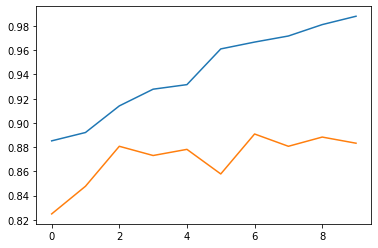

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [15]:
np.median(history.history['accuracy'])

0.9463613629341125

*Question 4*: median of training accuracy is **~0.9**

In [17]:
np.std(history.history['loss'])

0.07425729518608969

*Question 5*: std of training loss is **<0.1**

In [18]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    )

train_ds = train_gen.flow_from_directory(
    './train',
     target_size=(150, 150),
     batch_size=20,
     shuffle=True,
     class_mode='binary',
)

Found 1594 images belonging to 2 classes.


In [19]:
history_aug = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 16s 204ms/step - loss: 0.4654 - accuracy: 0.7829 - val_loss: 0.2560 - val_accuracy: 0.8934
Epoch 2/10
80/80 [==============================] - 17s 214ms/step - loss: 0.4112 - accuracy: 0.8168 - val_loss: 0.4883 - val_accuracy: 0.7766
Epoch 3/10
80/80 [==============================] - 16s 202ms/step - loss: 0.3980 - accuracy: 0.8250 - val_loss: 0.5022 - val_accuracy: 0.7563
Epoch 4/10
80/80 [==============================] - 16s 203ms/step - loss: 0.3716 - accuracy: 0.8312 - val_loss: 0.3448 - val_accuracy: 0.8401
Epoch 5/10
80/80 [==============================] - 19s 236ms/step - loss: 0.3663 - accuracy: 0.8469 - val_loss: 0.3795 - val_accuracy: 0.8274
Epoch 6/10
80/80 [==============================] - 17s 217ms/step - loss: 0.3366 - accuracy: 0.8695 - val_loss: 0.3278 - val_accuracy: 0.8426
Epoch 7/10
80/80 [==============================] - 22s 278ms/step - loss: 0.3559 - accuracy: 0.8457 - val_loss: 0.5134 - val_accuracy: 0.7868

In [20]:
np.mean(history_aug.history['val_loss'])

0.4421308100223541

*Question 5*: 

In [21]:
np.mean(history_aug.history['val_accuracy'][5:])

0.7954314827919007

*Question 6:*